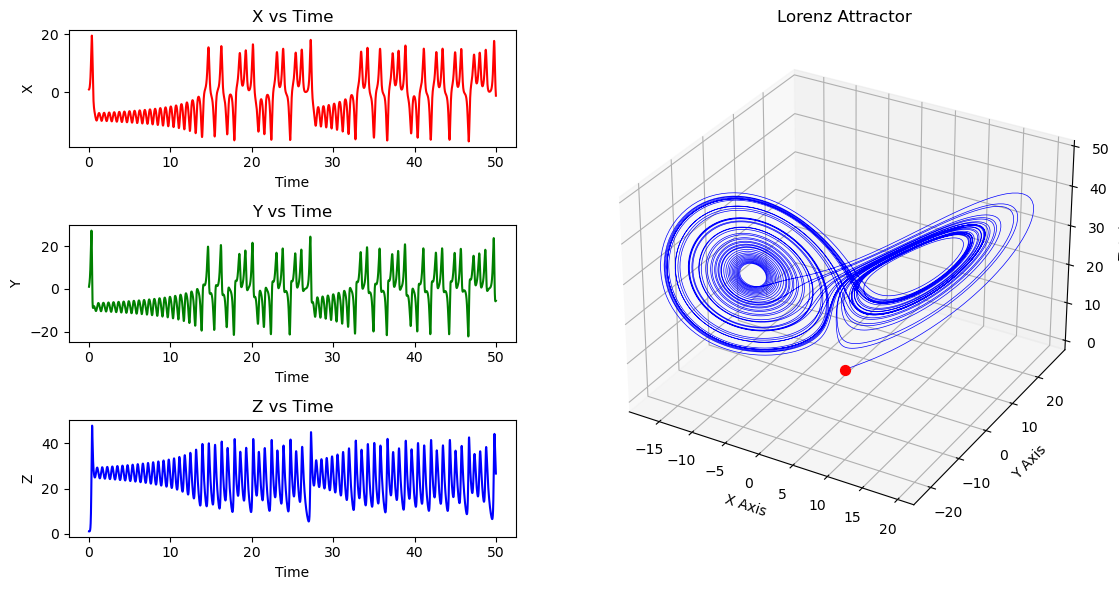

[0.0, 26.0, -1.6666666666666665]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lorenz system function
def lorenz(t, state, sigma=10, beta=8/3, rho=28):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Initial conditions
state0 = [1.0, 1.0, 1.0]

# Time span
time_span = (0, 50)
time_eval = np.linspace(time_span[0], time_span[1], 10000)

# Solve the system
solution = solve_ivp(lorenz, time_span, state0, t_eval=time_eval)
t, x, y, z = solution.t, solution.y[0], solution.y[1], solution.y[2]

# Create figure and subplots
fig = plt.figure(figsize=(12, 6))
grid = fig.add_gridspec(3, 2, width_ratios=[1, 1.5], height_ratios=[1, 1, 1])  # Define grid layout


# X vs Time
ax1 = fig.add_subplot(grid[0,0])
ax1.plot(t, x, color='r')
ax1.set_title("X vs Time")
ax1.set_xlabel("Time")
ax1.set_ylabel("X")

# Y vs Time
ax2 = fig.add_subplot(grid[1,0])
ax2.plot(t, y, color='g')
ax2.set_title("Y vs Time")
ax2.set_xlabel("Time")
ax2.set_ylabel("Y")

# Z vs Time
ax3 = fig.add_subplot(grid[2,0])
ax3.plot(t, z, color='b')
ax3.set_title("Z vs Time")
ax3.set_xlabel("Time")
ax3.set_ylabel("Z")

# 3D Lorenz Attractor
ax4 = fig.add_subplot(grid[:,1], projection='3d')
ax4.plot(x, y, z, lw=0.5, color='blue')
ax4.scatter(x[0], y[0], z[0], color='red', s=50, label='Start')
ax4.set_xlabel("X Axis")
ax4.set_ylabel("Y Axis")
ax4.set_zlabel("Z Axis")
ax4.set_title("Lorenz Attractor")

# Adjust layout
plt.tight_layout()
plt.show()


## to see what is the divergence of the DE system

div = lorenz(0, state0)

print(div)



## divergence and derivatives

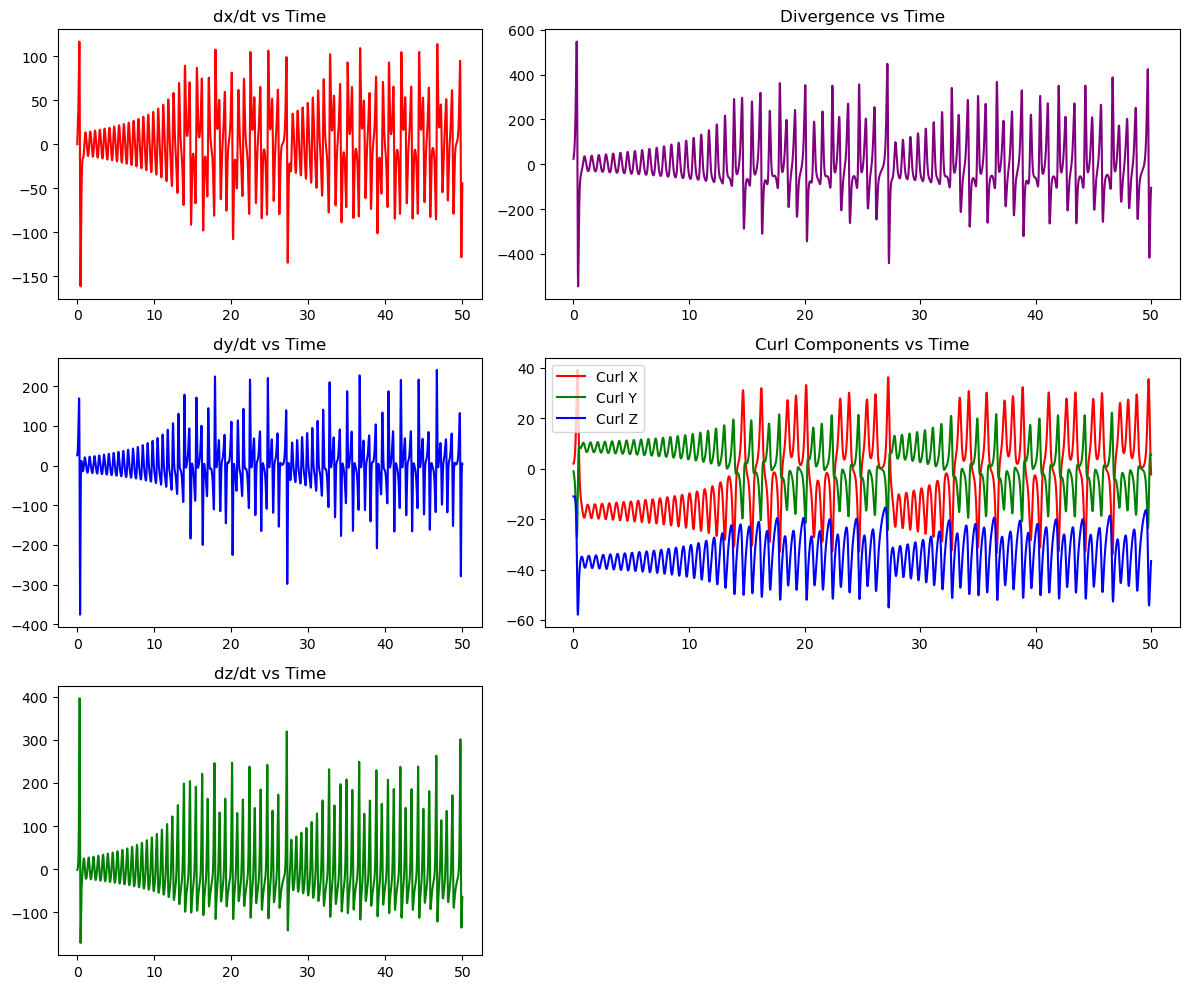

In [ ]:
dxdt_val = []
dydt_val = []
dzdt_val = []

divergence_val = []
curl_val = []

for x_val, y_val, z_val in zip(x, y, z):
    div = lorenz(0, [x_val, y_val, z_val])
    
    dxdt_val.append(div[0])
    dydt_val.append(div[1])
    dzdt_val.append(div[2])
    
    divergence = div[0] + div[1] + div[2]
    divergence_val.append(divergence)
    
    # ! THE CURL IS DONE BY AI AND NOT ME, NEEDS TO BE DONE AND UNDERSTOOD, KINDLY IGNORE THE CURL FOR NOW
    # TODO, FIX THE CURL PART
    
    # Fix curl calculation: Use scalar values
    curl = [2*x_val, -y_val, -z_val - 10]  
    curl_val.append(curl)

# Convert curl_val to NumPy array for easier indexing
curl_val = np.array(curl_val)

# Plot results
fig2 = plt.figure(figsize=(12, 10))
grid2 = fig2.add_gridspec(3, 2, width_ratios=[1, 1.5], height_ratios=[1, 1, 1])

ax5 = fig2.add_subplot(grid2[0, 1])
ax5.plot(t, divergence_val, color='purple')
ax5.set_title("Divergence vs Time")

ax9 = fig2.add_subplot(grid2[1, 1])
ax9.plot(t, curl_val[:, 0], color='red', label='Curl X')
ax9.plot(t, curl_val[:, 1], color='green', label='Curl Y')
ax9.plot(t, curl_val[:, 2], color='blue', label='Curl Z')
ax9.legend()
ax9.set_title("Curl Components vs Time")

ax6 = fig2.add_subplot(grid2[0, 0])
ax6.plot(t, dxdt_val, color='r')
ax6.set_title("dx/dt vs Time")

ax7 = fig2.add_subplot(grid2[1, 0])
ax7.plot(t, dydt_val, color='b')
ax7.set_title("dy/dt vs Time")

ax8 = fig2.add_subplot(grid2[2, 0])
ax8.plot(t, dzdt_val, color='g')
ax8.set_title("dz/dt vs Time")

plt.tight_layout()
plt.show()
